In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd

In [4]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
model=Sequential()

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [10]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3
def __iter__(self): return 0
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='fB2gBZtgmuKMxsSuBBRrf81URXUBcqY96qpfLo695_Cw',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')
bucket = 'aircraftdetection-donotdelete-pr-jnluir9dw50anj'
object_key = 'Aircraft Dent Detection.zip'
streaming_body_3 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

In [11]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_3.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [12]:
file_paths

['Aircraft Dent Detection/test/',
 'Aircraft Dent Detection/test/defect/',
 'Aircraft Dent Detection/test/defect/0523005-222-Weu-0523005-100-Cessna-172L-Wing-Structure-Assy-RH-Damaged-3D_jpg.rf.0929846f483070a518d43caa58438aed.jpg',
 'Aircraft Dent Detection/test/defect/0523005-91-Cessna-172L-Wing-Structure-Assembly-LH-Damaged-1S-1_jpg.rf.18417e601b6c87faca6443dbbce6e229.jpg',
 'Aircraft Dent Detection/test/defect/0523005-91-Cessna-172L-Wing-Structure-Assembly-LH-Damaged-2S_jpg.rf.0aa9e8317fc301a66fd9ebf8790c8edf.jpg',
 'Aircraft Dent Detection/test/defect/0523005-91-Cessna-172L-Wing-Structure-Assembly-LH-Damaged-4S_jpg.rf.ada9dba413788cef491d26bc41938baf.jpg',
 'Aircraft Dent Detection/test/defect/0712000-32-Cessna-180-Skin-Aft-Section-Upper_jpg.rf.171c407cf0152a3cd7d380adbf8c9000.jpg',
 'Aircraft Dent Detection/test/defect/0826000-40-Cessna-310D-Main-Gear-Wheel-Well-Door-Assembly-RH-1S_jpg.rf.10716bcbae8e1f81b81125bd92820f51.jpg',
 'Aircraft Dent Detection/test/defect/0922200-3-Cessn

In [13]:
ls

'Aircraft Dent Detection'/


In [14]:
pwd

'/home/wsuser/work'

In [15]:
batch_size=24
train_generator = train_datagen.flow_from_directory(
    r'/home/wsuser/work/Aircraft Dent Detection/train/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

Found 290 images belonging to 2 classes.


In [16]:
validation_generator = validation_datagen.flow_from_directory(
    r'/home/wsuser/work/Aircraft Dent Detection/test/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

Found 21 images belonging to 2 classes.


In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [18]:
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // batch_size
)


Epoch 1/10
12/12 [==============================] - 59s 5s/step - loss: 0.6035 - accuracy: 0.8421
Epoch 2/10
12/12 [==============================] - 68s 6s/step - loss: 0.2755 - accuracy: 0.9060
Epoch 3/10
12/12 [==============================] - 75s 6s/step - loss: 0.2461 - accuracy: 0.8985
Epoch 4/10
12/12 [==============================] - 74s 6s/step - loss: 0.2343 - accuracy: 0.9023
Epoch 5/10
12/12 [==============================] - 74s 6s/step - loss: 0.2108 - accuracy: 0.8910
Epoch 6/10
12/12 [==============================] - 75s 6s/step - loss: 0.2043 - accuracy: 0.9098
Epoch 7/10
12/12 [==============================] - 76s 6s/step - loss: 0.1405 - accuracy: 0.9323
Epoch 8/10
12/12 [==============================] - 79s 7s/step - loss: 0.1798 - accuracy: 0.9173
Epoch 9/10
12/12 [==============================] - 76s 6s/step - loss: 0.1586 - accuracy: 0.9248
Epoch 10/10
12/12 [==============================] - 76s 6s/step - loss: 0.1229 - accuracy: 0.9398


In [38]:
test_loss, test_accuracy = model.evaluate(train_generator, verbose=2)
print("Test accuracy:", test_accuracy)


13/13 - 17s - loss: 0.1199 - accuracy: 0.9552 - 17s/epoch - 1s/step
Test accuracy: 0.9551724195480347


In [20]:
image_path = '/home/wsuser/work/Aircraft Dent Detection/test/defect/0523005-222-Weu-0523005-100-Cessna-172L-Wing-Structure-Assy-RH-Damaged-3D_jpg.rf.0929846f483070a518d43caa58438aed.jpg'
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = tf.expand_dims(image_array, 0)
prediction = model.predict(image_array)
if prediction[0][0] >= 0.5:
    print("Defective")
else:
    print("Non-Defective")


1/1 [==============================] - 0s 144ms/step
Defective


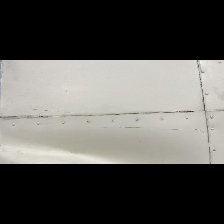

In [21]:
image

In [22]:
x=image_array
x

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dty

In [23]:
x.ndim

4

In [24]:
x=np.expand_dims(x,axis=0)
x

array([[[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         ...,

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]]], dtype=float32)

In [25]:
x.ndim

5

In [26]:
model.save('Aircraft.h5')

In [39]:
ls -l

total 520336
drwxrwx--- 4 wsuser wscommon      4096 Aug 30 13:03 'Aircraft Dent Detection'/
-rw-rw---- 1 wsuser wscommon 532814608 Aug 30 13:15  Aircraft.h5


In [27]:
!pip install ibm_watson_machine_learning

In [28]:
from ibm_watson_machine_learning import APIClient
wml_credentials={"url":"https://us-south.ml.cloud.ibm.com",
                 "apikey" : "JrIT26oZ--wTThvInglKdRzoT5xSRCkIW01-7HxwHdIT"}
client=APIClient(wml_credentials)

In [29]:
client

In [30]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"]==space_name)['metadata']['id'])
    

In [31]:
space_uid=guid_from_space_name(client,'model')
print("Space UID ="+space_uid)

Space UID =c3be8dd0-f879-41b7-b611-2743d5ce6de5


In [32]:
client.set.default_space(space_uid)

'SUCCESS'

In [33]:
client.software_specifications.list()

----------------------------  ------------------------------------  ----  ------------------  --------------------------
NAME                          ID                                    TYPE  STATE               REPLACEMENT
default_py3.6                 0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base  unsupported         runtime-22.2-py3.10
autoai-ts_rt23.1-py3.10       01ce9391-1a79-5a33-94fb-2e134337f314  base  supported
kernel-spark3.2-scala2.12     020d69ce-7ac1-5e68-ac1a-31189867356a  base  not_provided
pytorch-onnx_1.3-py3.7-edt    069ea134-3346-5748-b513-49120e15d288  base  not_provided
tensorflow_rt23.1-py3.10      079a91e0-245f-5269-8926-3c20b28f37dc  base  supported
scikit-learn_0.20-py3.6       09c5a1d0-9c1e-4473-a344-eb7b665ff687  base  unsupported         runtime-22.2-py3.10
spark-mllib_3.0-scala_2.12    09f4cff0-90a7-5899-b9ed-1ef348aebdee  base  unsupported
pytorch-onnx_rt22.1-py3.9     0b848dd4-e681-5599-be41-b5f6fccc6471  base  unsupported         pytorch-onnx_rt22.2-py3

,NAME,ID,TYPE,STATE,REPLACEMENT
0,default_py3.6,0062b8c9-8b7d-44a0-a9b9-46c416adcbd9,base,unsupported,runtime-22.2-py3.10
1,autoai-ts_rt23.1-py3.10,01ce9391-1a79-5a33-94fb-2e134337f314,base,supported,
2,kernel-spark3.2-scala2.12,020d69ce-7ac1-5e68-ac1a-31189867356a,base,not_provided,
3,pytorch-onnx_1.3-py3.7-edt,069ea134-3346-5748-b513-49120e15d288,base,not_provided,
4,tensorflow_rt23.1-py3.10,079a91e0-245f-5269-8926-3c20b28f37dc,base,supported,
5,scikit-learn_0.20-py3.6,09c5a1d0-9c1e-4473-a344-eb7b665ff687,base,unsupported,runtime-22.2-py3.10
6,spark-mllib_3.0-scala_2.12,09f4cff0-90a7-5899-b9ed-1ef348aebdee,base,unsupported,
7,pytorch-onnx_rt22.1-py3.9,0b848dd4-e681-5599-be41-b5f6fccc6471,base,unsupported,pytorch-onnx_rt22.2-py3.10
8,ai-function_0.1-py3.6,0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda,base,unsupported,runtime-22.2-py3.10
9,shiny-r3.6,0e6e79df-875e-4f24-8ae9-62dcc2148306,base,not_provided,


In [66]:
software_spec_uid=client.software_specifications.get_uid_by_name("tensorflow_rt23.1-py3.10")
software_spec_uid

'079a91e0-245f-5269-8926-3c20b28f37dc'

In [67]:
import tensorflow as tf
tf.__version__

'2.9.3'

In [78]:
model_details=client.repository.store_model(model='aircraft-detection-model.tgz',
meta_props={client.repository.ModelMetaNames.NAME:"Aircraft",
client.repository.ModelMetaNames.TYPE:"tensorflow-py2.9.3",
client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid})
model_id=client.repository.get_model_uid(model_details)

Failure during creating model. (POST https://us-south.ml.cloud.ibm.com/ml/v4/models?version=2021-06-24&space_id=c3be8dd0-f879-41b7-b611-2743d5ce6de5)
Status code: 400, body: {
  "trace": "ff4456d4f77631fae5c5449ae451a9a3",
  "errors": [{
    "code": "invalid_request_entity",
    "message": "Invalid request entity: Unsupported model type 'tensorflow-py2.9.3'",
    "more_info": "https://cloud.ibm.com/apidocs/machine-learning"
  }],
  "status_code": "400"
}


ApiRequestFailure: Failure during creating model. (POST https://us-south.ml.cloud.ibm.com/ml/v4/models?version=2021-06-24&space_id=c3be8dd0-f879-41b7-b611-2743d5ce6de5)
Status code: 400, body: {
  "trace": "ff4456d4f77631fae5c5449ae451a9a3",
  "errors": [{
    "code": "invalid_request_entity",
    "message": "Invalid request entity: Unsupported model type 'tensorflow-py2.9.3'",
    "more_info": "https://cloud.ibm.com/apidocs/machine-learning"
  }],
  "status_code": "400"
}

In [ ]:
model_id=client.repository.get_model_id(model_details)

In [42]:
from tensorflow.keras.models import load_model

In [43]:
!tar -zcvf aircraft-detection-model.tgz Aircraft.h5

Aircraft.h5


In [44]:
ls

'Aircraft Dent Detection'/   aircraft-detection-model.tgz   Aircraft.h5


In [51]:
!conda list


# packages in environment at /opt/conda/envs/Python-3.10:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                        main  
_openmp_mutex             5.1                       1_gnu  
_pytorch_select           1.0                       cpu_2    open-ce
_tensorflow_select        1.0                       cpu_2    open-ce
abseil-cpp                20210324.2           h2531618_0  
absl-py                   1.0.0              pyh93532dd_0    open-ce
aiohttp                   3.8.1           py310h7f8727e_1  
aiosignal                 1.2.0              pyhd3eb1b0_0  
appdirs                   1.4.4              pyhd3eb1b0_0  
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0          py310h7f8727e_0  
arrow-cpp                 8.0.0           py310h5fe6c7e_2_cpu    open-ce
assetframe-lib            0.1.5                    pypi_0    pypi
asttokens                 2.0.5              py